#   شیکردنەوەی داتای تۆمارکردنی هۆتێل<br> (Hotel Booking Data Analysis)


In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st

In [2]:
mydata = pd.read_csv('hotel_booking.csv')

In [3]:
mydata.hotel.head(5)

,hotel
0,Resort Hotel
1,Resort Hotel
2,Resort Hotel
3,Resort Hotel
4,Resort Hotel


In [4]:
#mydata.head(10)
#mydata.columns
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           69999 non-null  object 
 1   is_canceled                     69999 non-null  int64  
 2   lead_time                       69999 non-null  int64  
 3   arrival_date_year               69999 non-null  int64  
 4   arrival_date_month              69999 non-null  object 
 5   arrival_date_week_number        69999 non-null  int64  
 6   arrival_date_day_of_month       69999 non-null  int64  
 7   stays_in_weekend_nights         69999 non-null  int64  
 8   stays_in_week_nights            69999 non-null  int64  
 9   adults                          69999 non-null  int64  
 10  children                        69995 non-null  float64
 11  babies                          69999 non-null  int64  
 12  meal                            

In [5]:
mydata.lead_time.std

<bound method Series.std of 0        342
1        737
2          7
3         13
4         14
        ... 
69994    130
69995    130
69996    169
69997     29
69998    110
Name: lead_time, Length: 69999, dtype: int64>

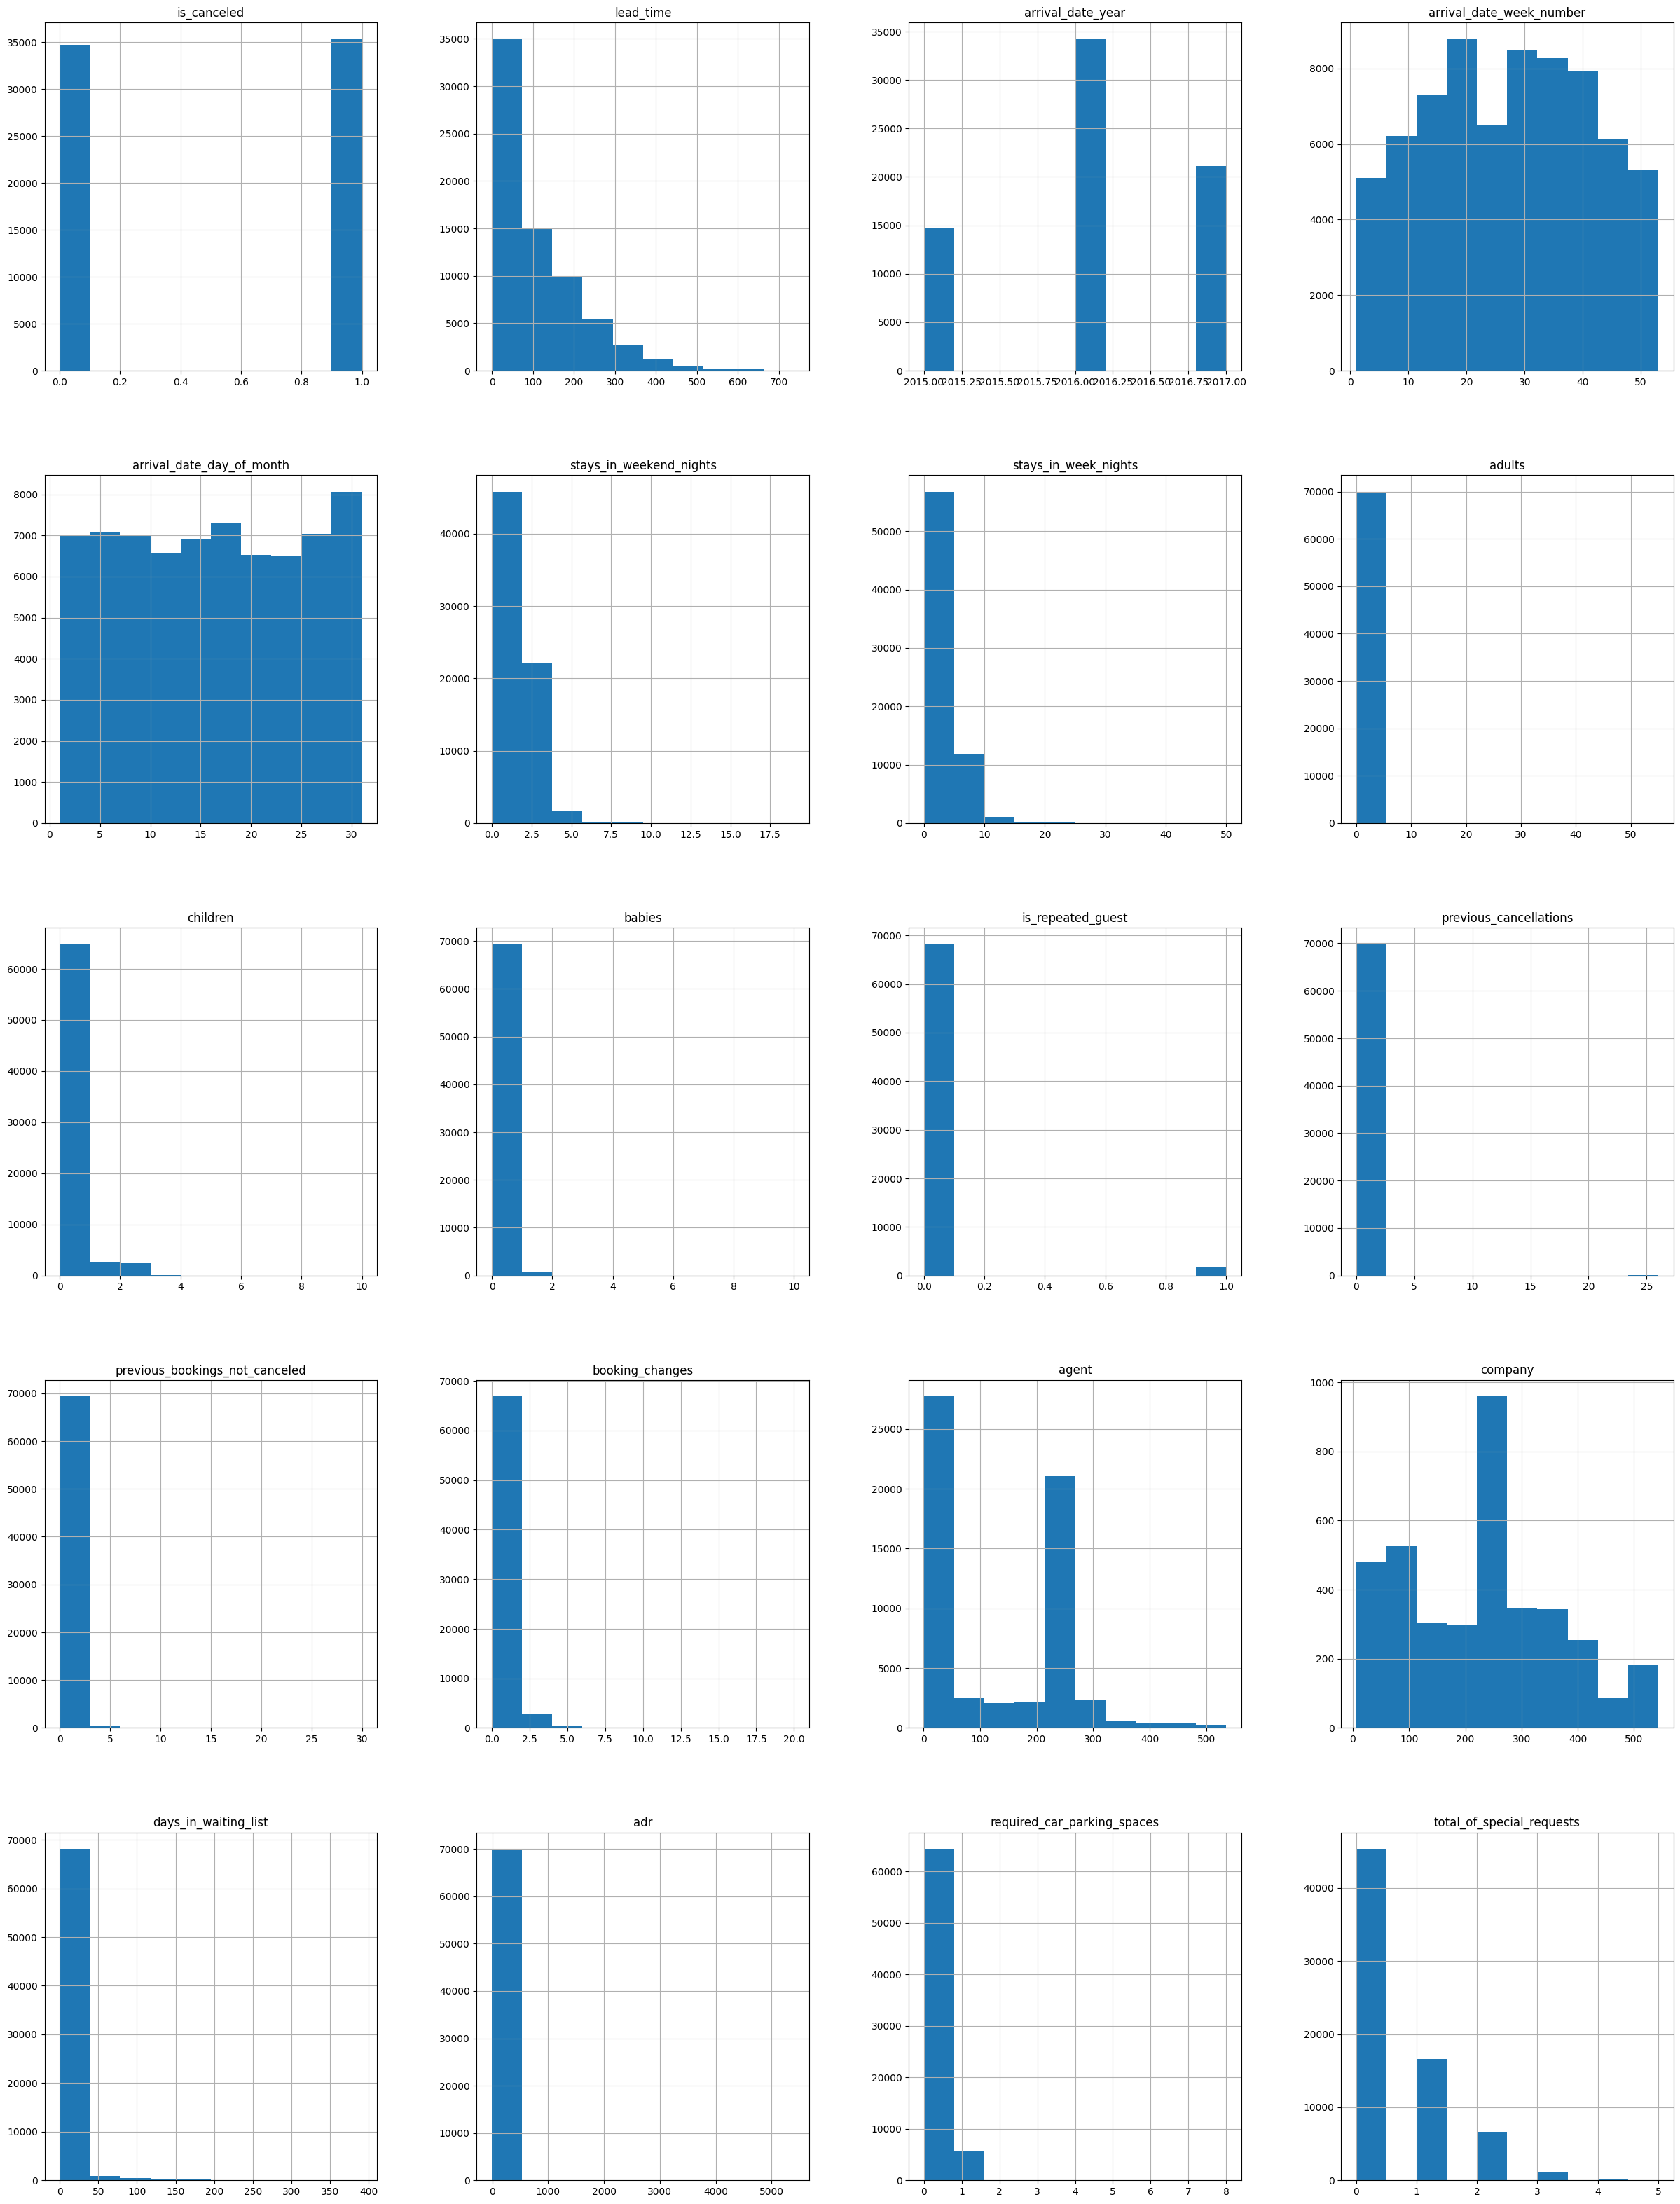

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

mydata.hist(figsize=(30,40))
plt.show()

<Axes: xlabel='hotel', ylabel='stays_in_week_nights'>

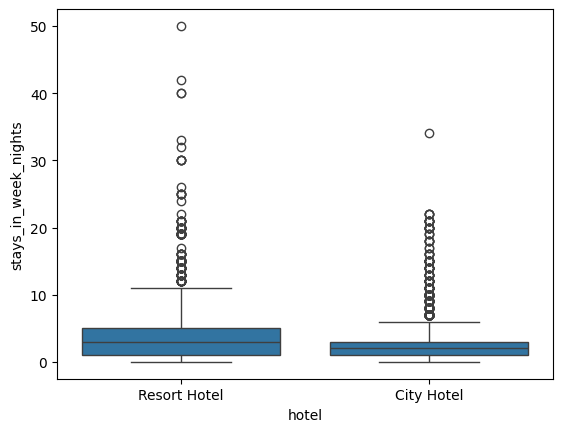

In [7]:
import seaborn as sns

sns.boxplot(x="hotel", y="stays_in_week_nights", data=mydata)

In [8]:
pd.crosstab(mydata['country'],mydata['meal'] )

meal,BB,FB,HB,SC,Undefined
country,,,,,
AGO,174,0,1,60,0
ALB,4,0,0,1,0
AND,4,0,1,2,0
ARE,38,0,1,6,0
ARG,80,0,6,10,0
...,...,...,...,...,...
VGB,0,0,0,1,0
VNM,3,0,1,0,0
ZAF,27,0,1,13,0


In [9]:
pd.crosstab(mydata['hotel'],mydata['reserved_room_type'] )

reserved_room_type,A,B,C,D,E,F,G,H,L,P
hotel,,,,,,,,,,
City Hotel,24641,487,4,3653,386,670,90,0,0,8
Resort Hotel,23399,3,918,7433,4982,1106,1610,601,6,2


<Axes: xlabel='hotel', ylabel='count'>

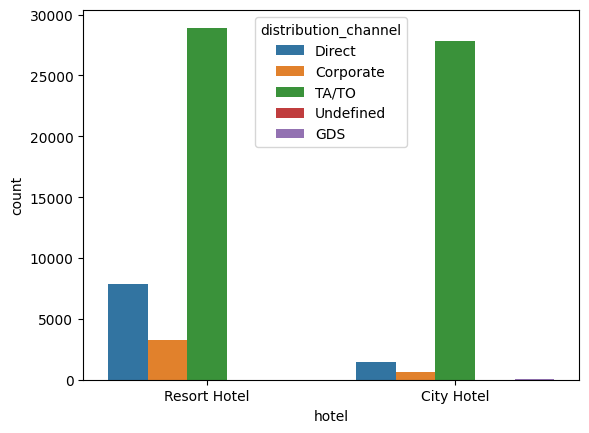

In [10]:
sns.countplot(x="hotel", hue="distribution_channel", data=mydata)

In [11]:
pd.pivot_table(mydata, index=['country', 'hotel'],
                     columns=[ 'meal'], aggfunc=len)

adr                          adults                 \
meal                     BB  FB   HB    SC Undefined     BB  FB   HB    SC   
country hotel                                                                
AGO     City Hotel    150.0 NaN  1.0  60.0       NaN  150.0 NaN  1.0  60.0   
        Resort Hotel   24.0 NaN  NaN   NaN       NaN   24.0 NaN  NaN   NaN   
ALB     City Hotel      1.0 NaN  NaN   1.0       NaN    1.0 NaN  NaN   1.0   
        Resort Hotel    3.0 NaN  NaN   NaN       NaN    3.0 NaN  NaN   NaN   
AND     City Hotel      NaN NaN  NaN   2.0       NaN    NaN NaN  NaN   2.0   
...                     ...  ..  ...   ...       ...    ...  ..  ...   ...   
ZAF     City Hotel     11.0 NaN  NaN  12.0       NaN   11.0 NaN  NaN  12.0   
        Resort Hotel   16.0 NaN  1.0   1.0       NaN   16.0 NaN  1.0   1.0   
ZMB     City Hotel      NaN NaN  NaN   1.0       NaN    NaN NaN  NaN   1.0   
        Resort Hotel    1.0 NaN  NaN   NaN       NaN    1.0 NaN  NaN   NaN   
ZWE     Resort Hotel    1.0 NaN  1.0   NaN       NaN    1.0 NaN  1.0   NaN   

                                ... stays_in_weekend_nights                 \
meal                 Undefined  ...                      BB  FB   HB    SC   
country hotel                   ...                                          
AGO     City Hotel         NaN  ...                   150.0 NaN  1.0  60.0   
        Resort Hotel       NaN  ...                    24.0 NaN  NaN   NaN   
ALB     City Hotel         NaN  ...                     1.0 NaN  NaN   1.0   
        Resort Hotel       NaN  ...                     3.0 NaN  NaN   NaN   
AND     City Hotel         NaN  ...                     NaN NaN  NaN   2.0   
...                        ...  ...                     ...  ..  ...   ...   
ZAF     City Hotel         NaN  ...                    11.0 NaN  NaN  12.0   
        Resort Hotel       NaN  ...                    16.0 NaN  1.0   1.0   
ZMB     City Hotel         NaN  ...                     NaN NaN  NaN   1.0   
        Resort Hotel       NaN  ...                     1.0 NaN  NaN   NaN   
ZWE     Resort Hotel       NaN  ...                     1.0 NaN  1.0   NaN   

                               total_of_special_requests                 \
meal                 Undefined                        BB  FB   HB    SC   
country hotel                                                             
AGO     City Hotel         NaN                     150.0 NaN  1.0  60.0   
        Resort Hotel       NaN                      24.0 NaN  NaN   NaN   
ALB     City Hotel         NaN                       1.0 NaN  NaN   1.0   
        Resort Hotel       NaN                       3.0 NaN  NaN   NaN   
AND     City Hotel         NaN                       NaN NaN  NaN   2.0   
...                        ...                       ...  ..  ...   ...   
ZAF     City Hotel         NaN                      11.0 NaN  NaN  12.0   
        Resort Hotel       NaN                      16.0 NaN  1.0   1.0   
ZMB     City Hotel         NaN                       NaN NaN  NaN   1.0   
        Resort Hotel       NaN                       1.0 NaN  NaN   NaN   
ZWE     Resort Hotel       NaN                       1.0 NaN  1.0   NaN   

                                
meal                 Undefined  
country hotel                   
AGO     City Hotel         NaN  
        Resort Hotel       NaN  
ALB     City Hotel         NaN  
        Resort Hotel       NaN  
AND     City Hotel         NaN  
...                        ...  
ZAF     City Hotel         NaN  
        Resort Hotel       NaN  
ZMB     City Hotel         NaN  
        Resort Hotel       NaN  
ZWE     Resort Hotel       NaN  

[252 rows x 165 columns]

In [12]:
pd.pivot_table(mydata,'stays_in_week_nights', index=['country'],
                     columns=[ 'hotel'])

hotel,City Hotel,Resort Hotel
country,,
AGO,7.725118,2.250000
ALB,2.000000,2.000000
AND,1.000000,4.000000
ARE,3.676471,2.727273
ARG,2.564103,2.368421
...,...,...
VGB,2.000000,NaN
VNM,1.000000,2.000000
ZAF,2.260870,2.666667


In [13]:
mydata['stays_in_week_nights'].std()

2.1511763100179766

In [14]:
mydata['stays_in_week_nights'].mean()

np.float64(2.7692824183202616)

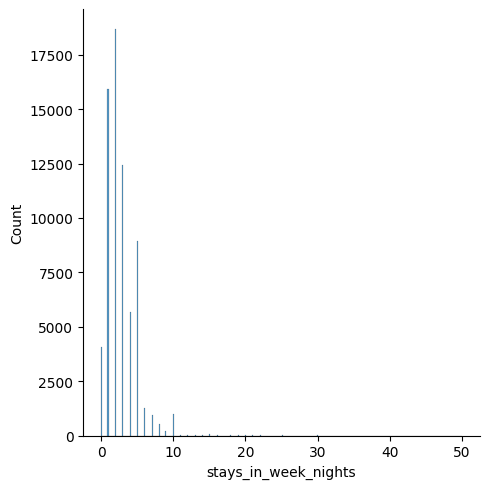

In [15]:
sns.displot(mydata['stays_in_week_nights'])

array([<Axes: title={'center': 'City Hotel'}>,
       <Axes: title={'center': 'Resort Hotel'}>], dtype=object)

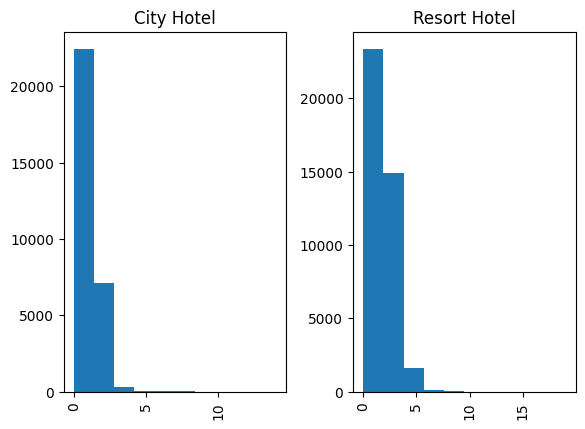

In [16]:
mydata.hist(by='hotel',column = 'stays_in_weekend_nights')

array([<Axes: title={'center': 'City Hotel'}>,
       <Axes: title={'center': 'Resort Hotel'}>], dtype=object)

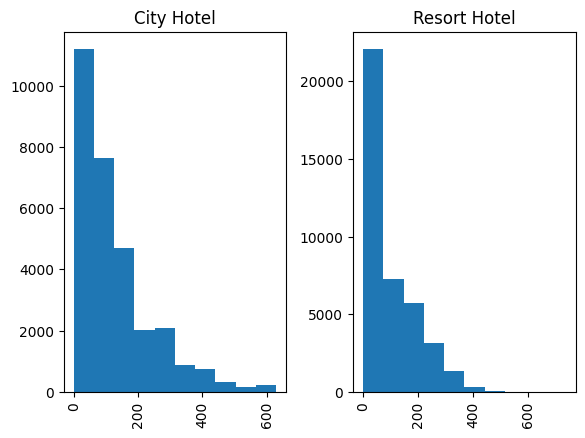

In [17]:
mydata.hist(by='hotel',column = 'lead_time')

array([<Axes: title={'center': 'City Hotel'}>,
       <Axes: title={'center': 'Resort Hotel'}>], dtype=object)

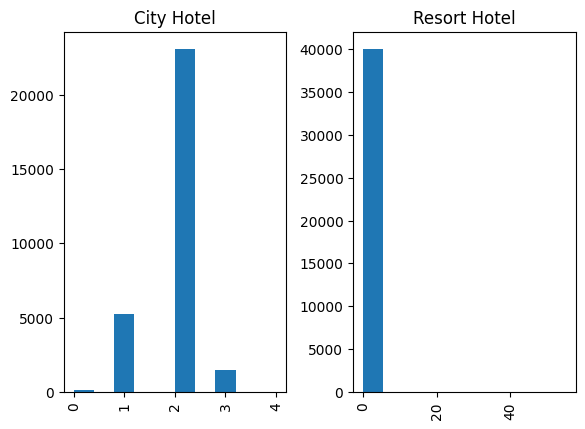

In [18]:
mydata.hist(by='hotel',column = 'adults')

array([[<Axes: title={'center': 'AGO'}>, <Axes: title={'center': 'ALB'}>,
        <Axes: title={'center': 'AND'}>, <Axes: title={'center': 'ARE'}>,
        <Axes: title={'center': 'ARG'}>, <Axes: title={'center': 'ARM'}>,
        <Axes: title={'center': 'AUS'}>, <Axes: title={'center': 'AUT'}>,
        <Axes: title={'center': 'AZE'}>, <Axes: title={'center': 'BDI'}>,
        <Axes: title={'center': 'BEL'}>, <Axes: title={'center': 'BEN'}>],
       [<Axes: title={'center': 'BGD'}>, <Axes: title={'center': 'BGR'}>,
        <Axes: title={'center': 'BHR'}>, <Axes: title={'center': 'BHS'}>,
        <Axes: title={'center': 'BIH'}>, <Axes: title={'center': 'BLR'}>,
        <Axes: title={'center': 'BRA'}>, <Axes: title={'center': 'BWA'}>,
        <Axes: title={'center': 'CAF'}>, <Axes: title={'center': 'CHE'}>,
        <Axes: title={'center': 'CHL'}>, <Axes: title={'center': 'CHN'}>],
       [<Axes: title={'center': 'CIV'}>, <Axes: title={'center': 'CMR'}>,
        <Axes: title={'center': 'CN'

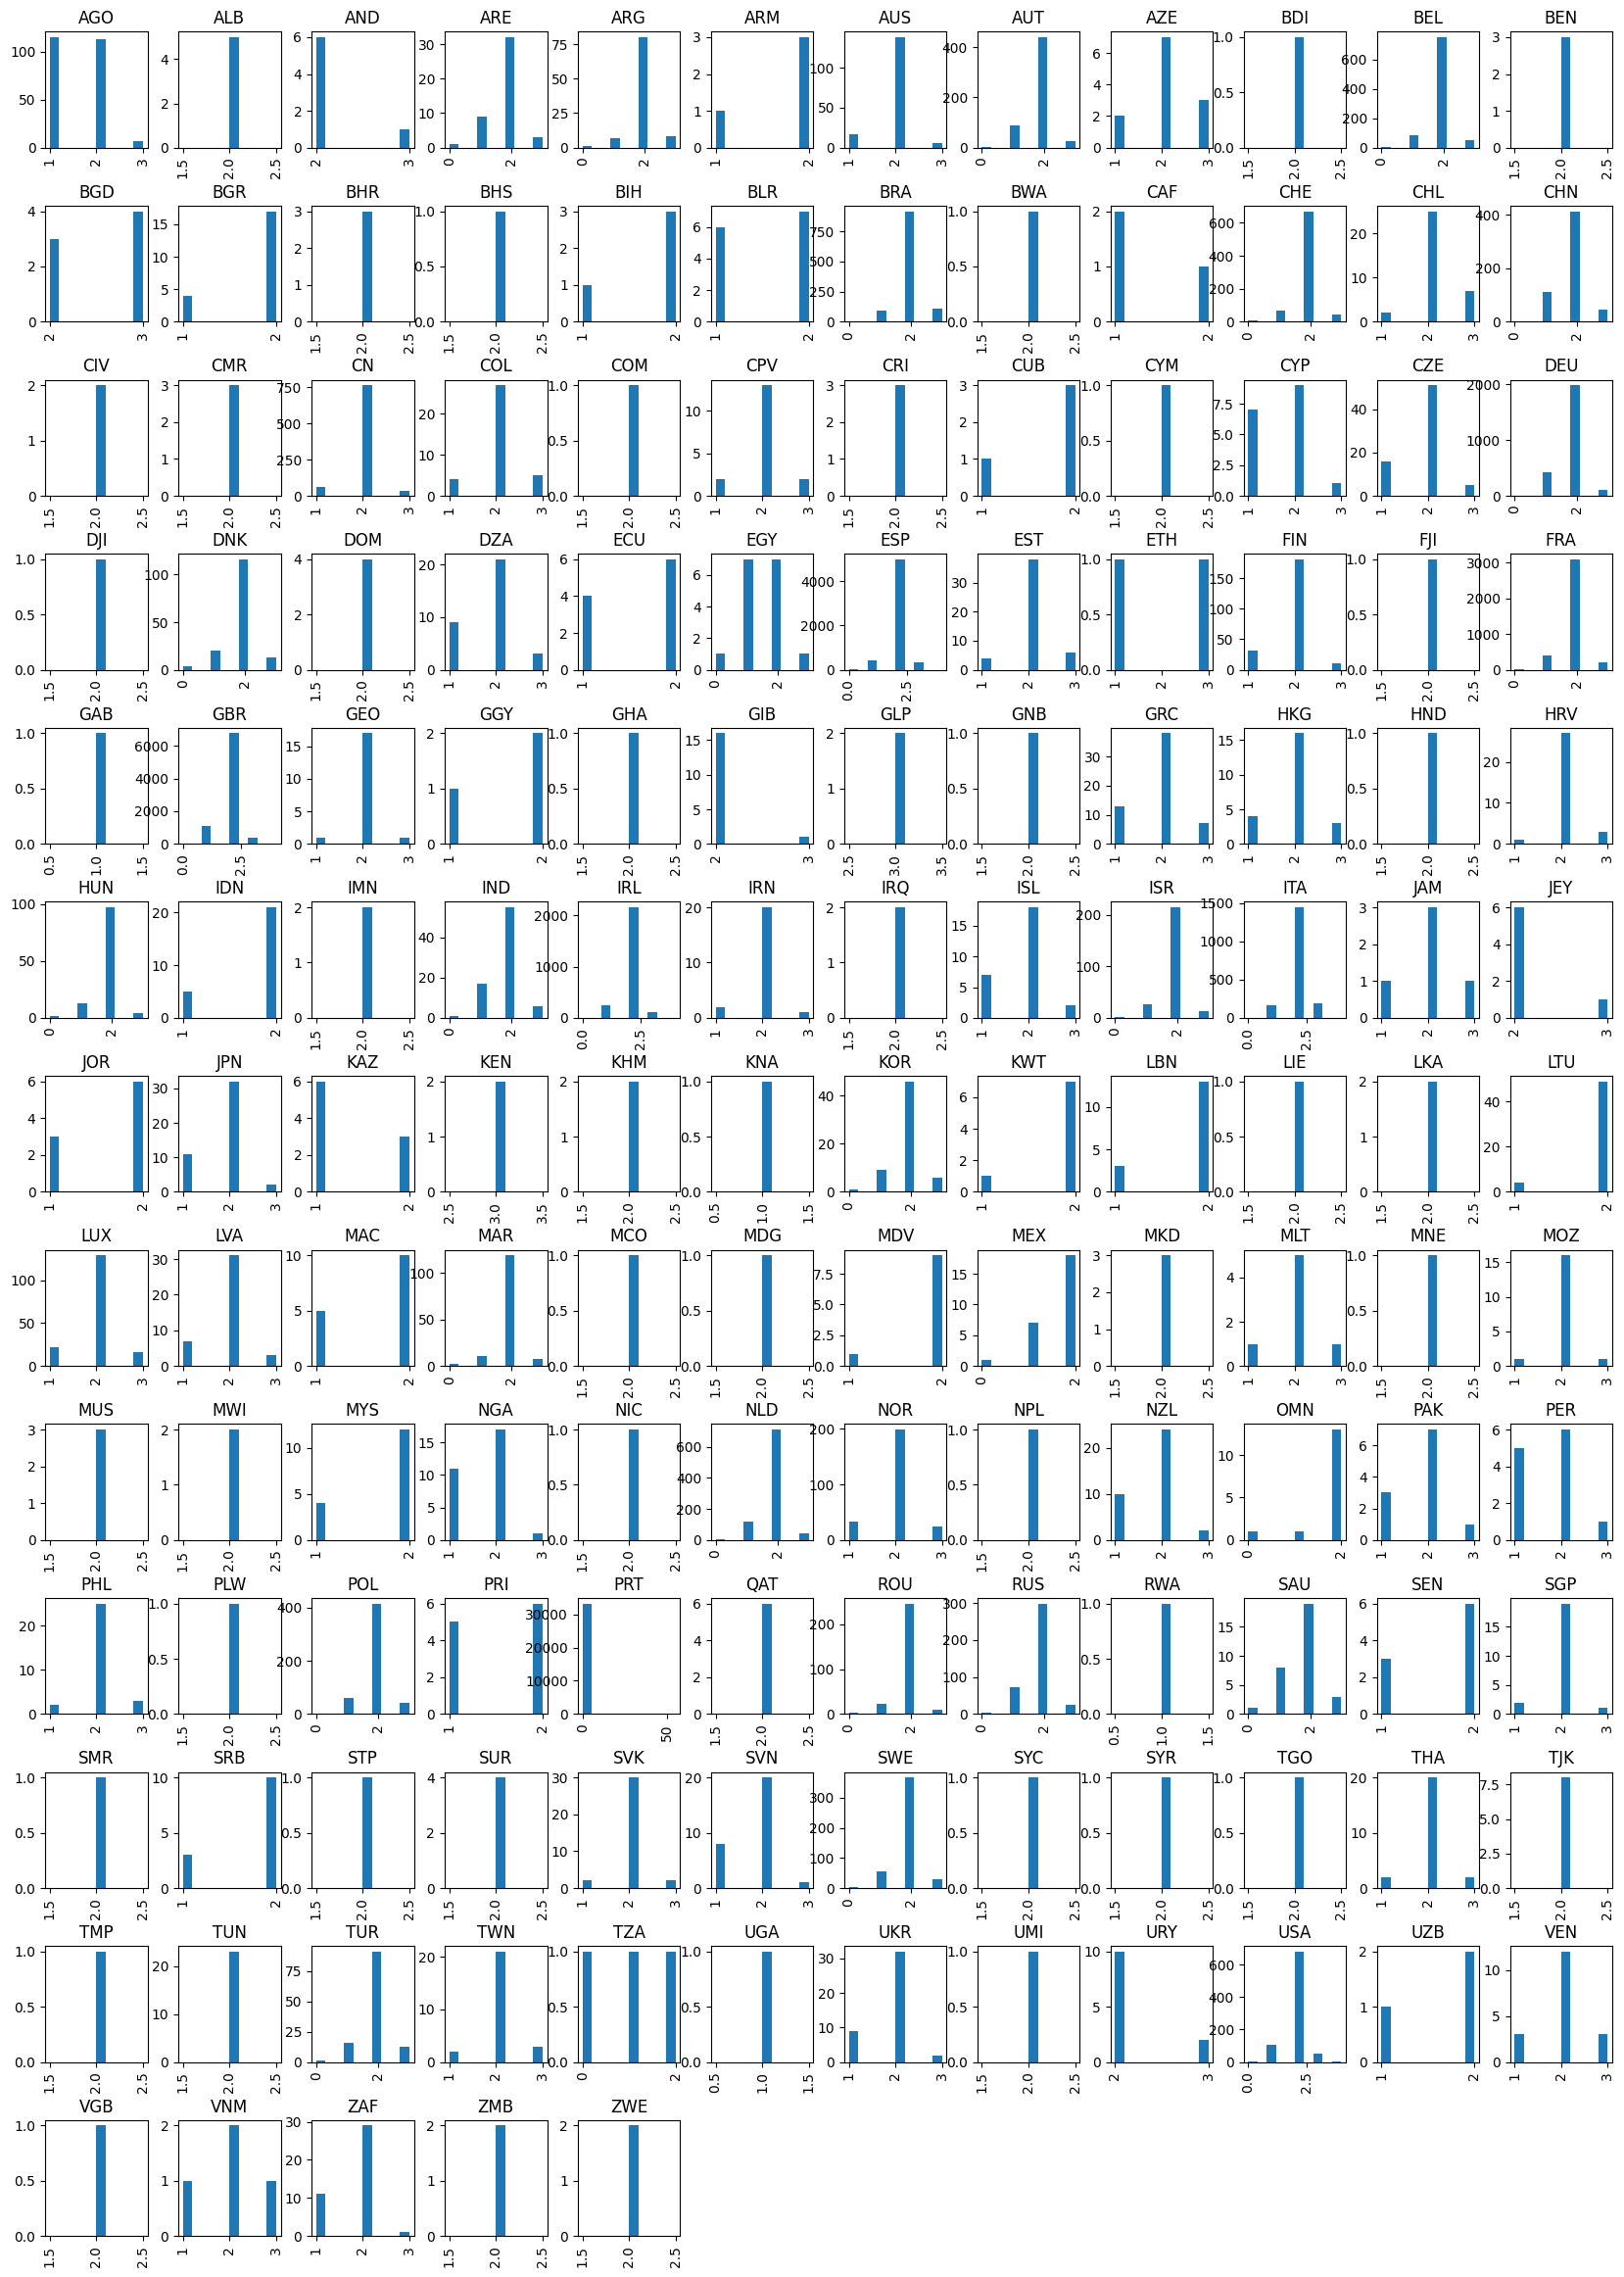

In [19]:
mydata.hist(by='country',column = 'adults', figsize=(20,30))

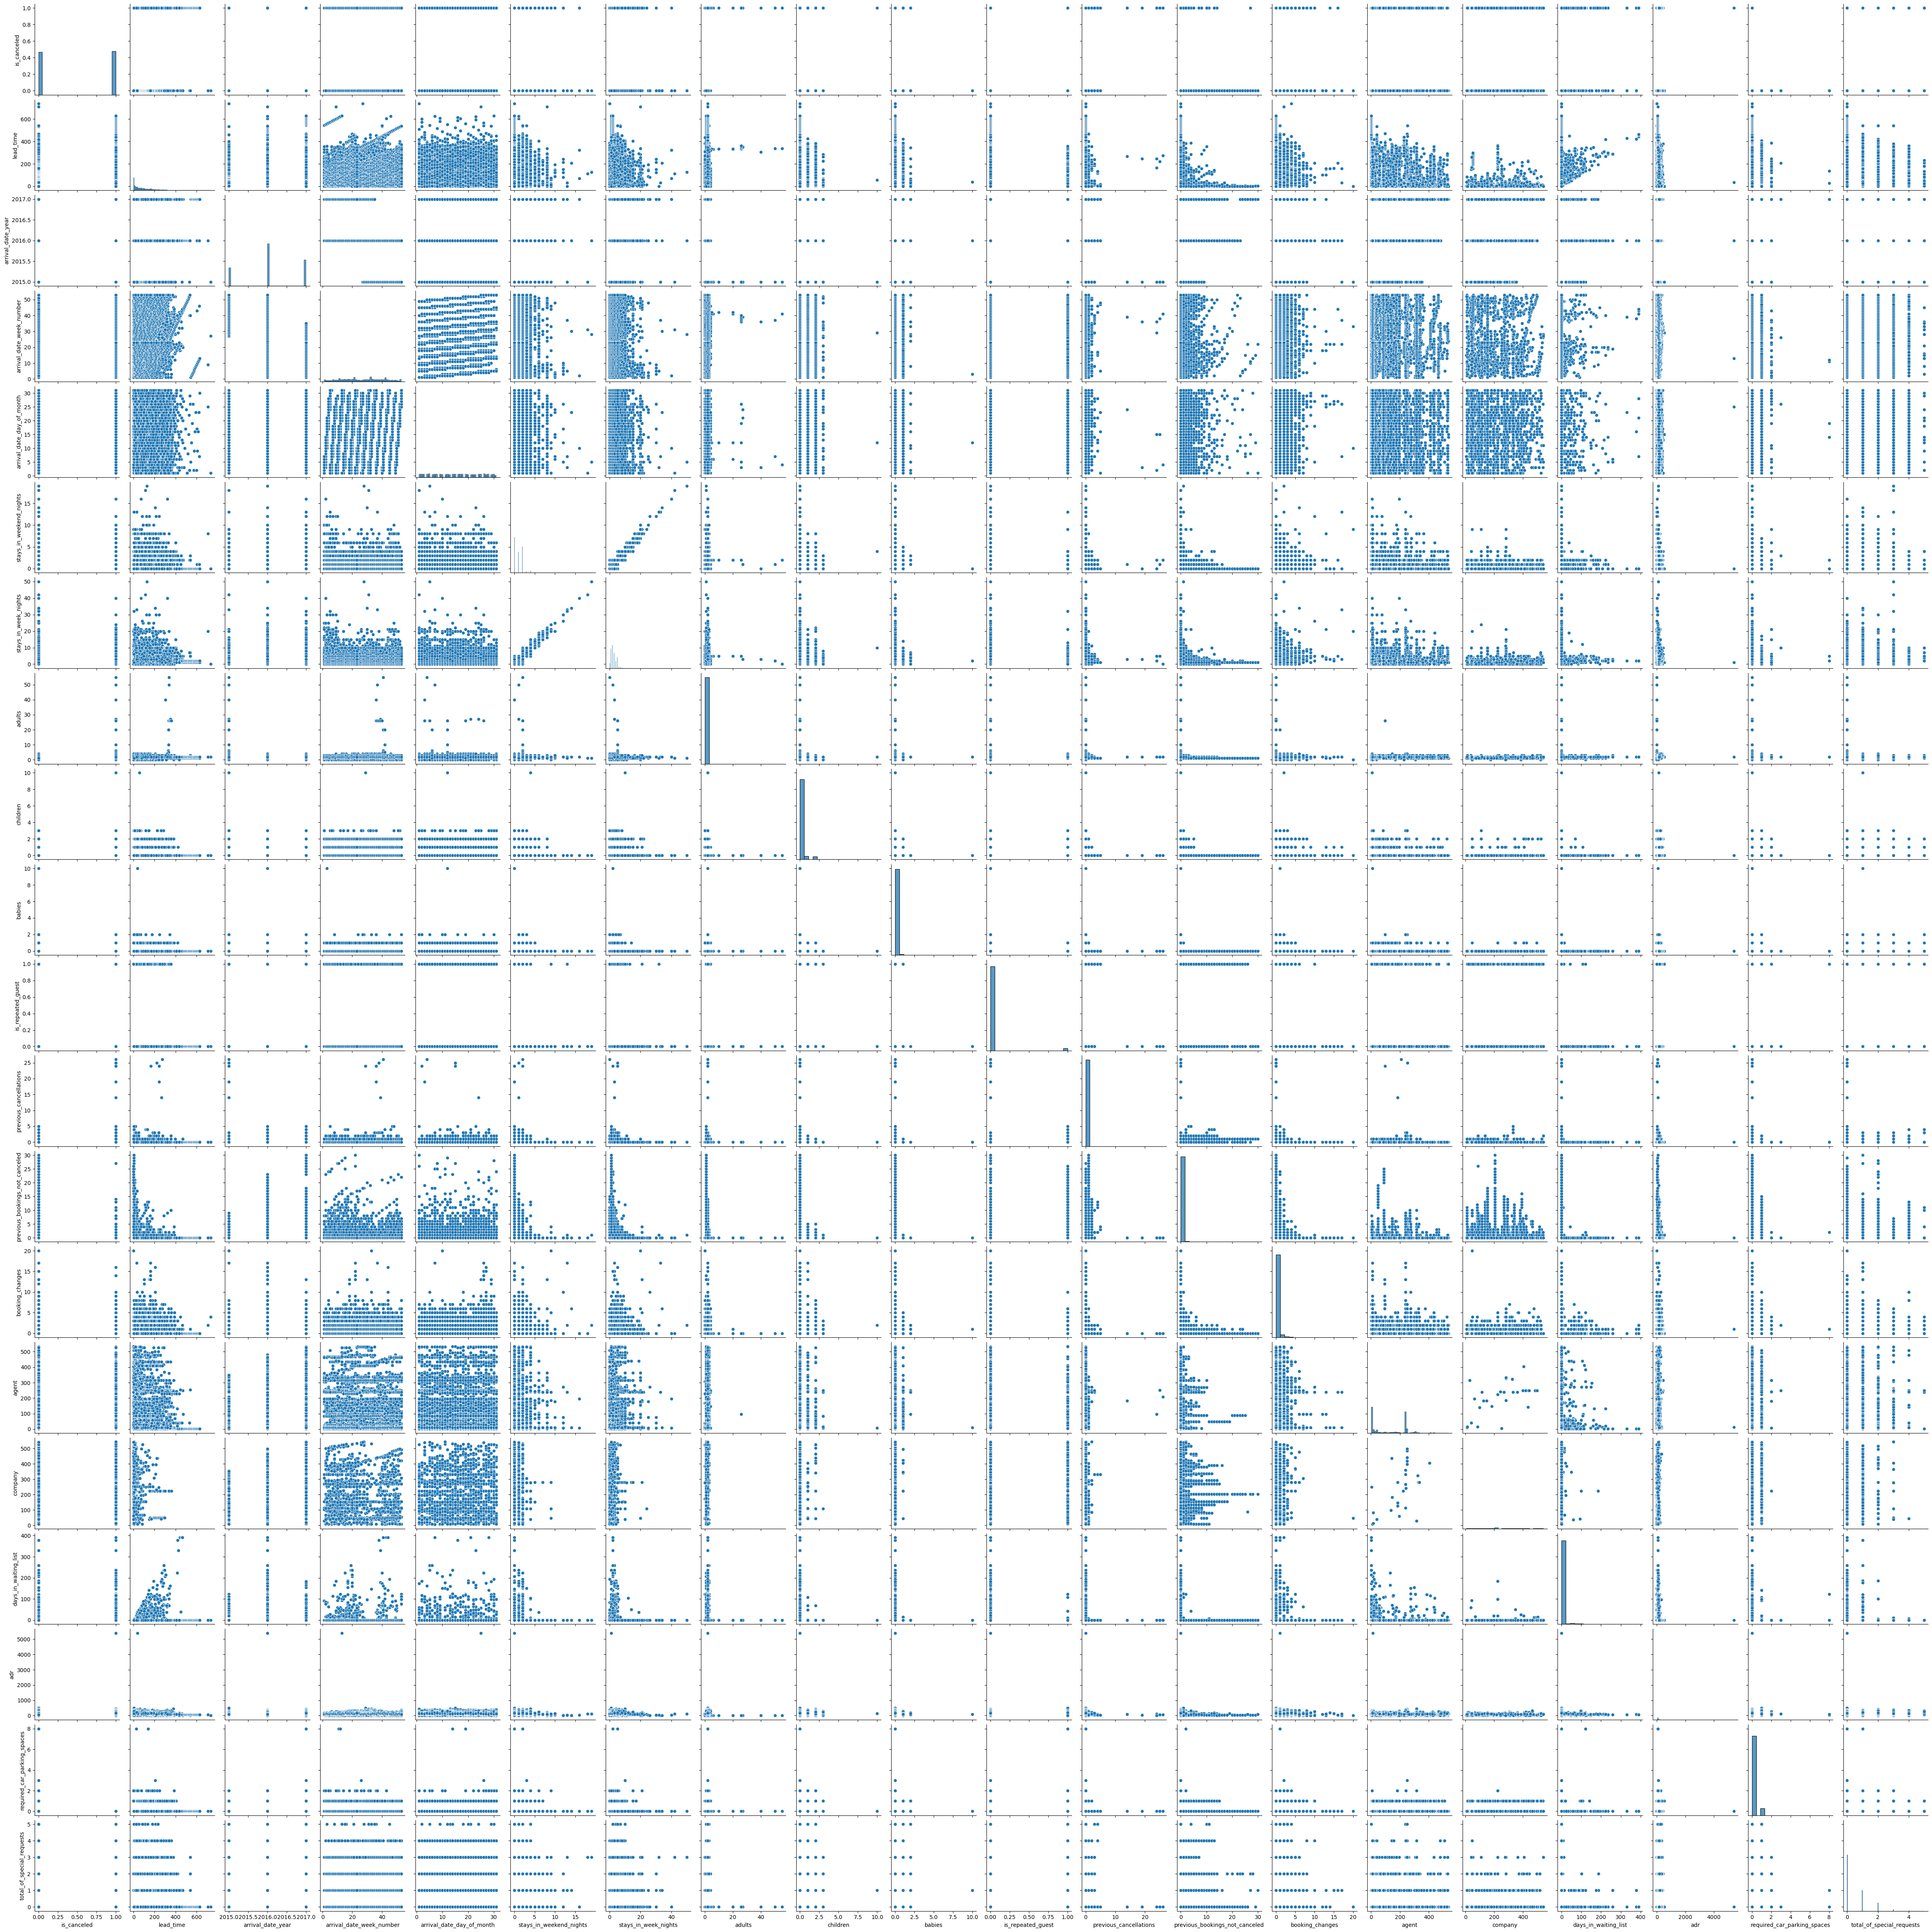

In [20]:
sns.pairplot(mydata)

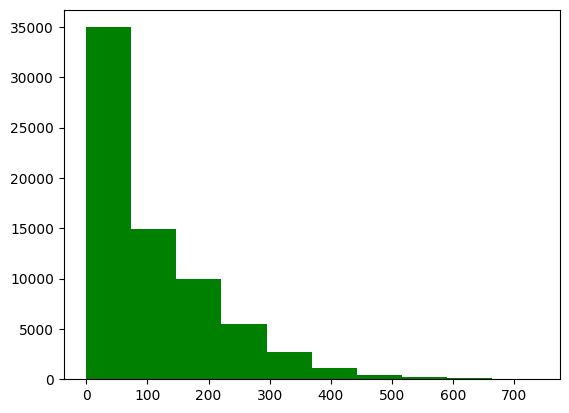

In [22]:
fig, ax = plt.subplots()
_ = plt.hist(mydata.lead_time, color = 'green')

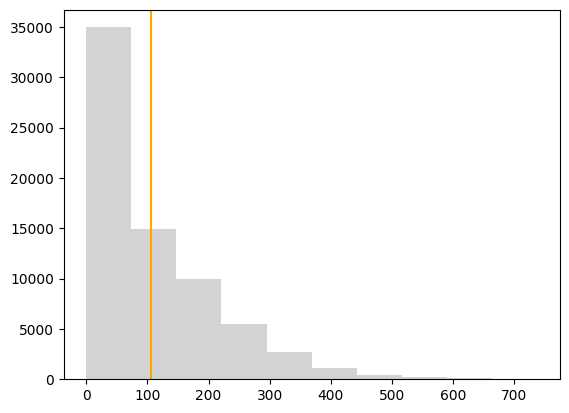

In [23]:
fig, ax = plt.subplots()
plt.axvline(x = mydata.lead_time.mean(), color='orange')
_ = plt.hist(mydata.lead_time, color = 'lightgray')

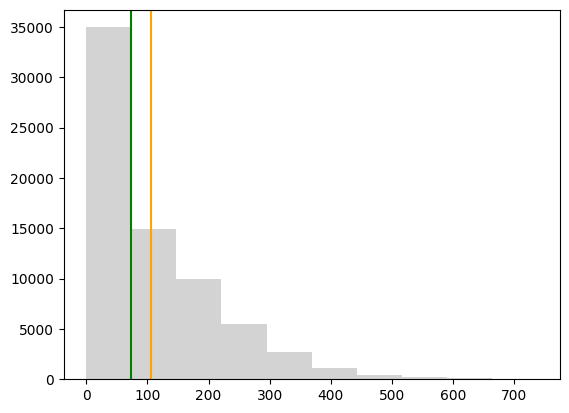

In [24]:
fig, ax = plt.subplots()
plt.axvline(x = np.mean(mydata.lead_time), color='orange')
plt.axvline(x = np.median(mydata.lead_time), color='green')
_ = plt.hist(mydata.lead_time, color = 'lightgray')

In [25]:
mydata.lead_time.var()

11500.776693895987

In [26]:
sigma = mydata.lead_time.std()
sigma

107.24167424045555

In [27]:
xbar = mydata.lead_time.mean()

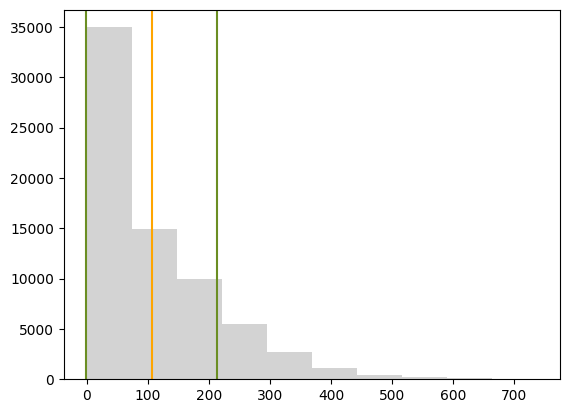

In [28]:
fig, ax = plt.subplots()
plt.axvline(x = xbar, color='orange')
plt.axvline(x = xbar+sigma, color='olivedrab')
plt.axvline(x = xbar-sigma, color='olivedrab')
_ = plt.hist(mydata.lead_time, color = 'lightgray')

In [29]:
st.sem(mydata.lead_time)

NameError: name 'st' is not defined